# [EDA: Financial Statements](#section-title)

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_poly = pd.read_csv('../data/cleaned_csvs_interim_steps/polygon_io_output.csv');

In [3]:
df_poly.head()

,cik,company_name,fiscal_period,fiscal_year,filing_date,is_basic_earnings_per_share_unit,is_basic_earnings_per_share_value,is_cost_of_revenue_unit,is_cost_of_revenue_value,is_gross_profit_unit,...,bs_other_than_fixed_noncurrent_assets_value,bs_equity_attributable_to_parent_unit,bs_equity_attributable_to_parent_value,bs_noncurrent_liabilities_unit,bs_noncurrent_liabilities_value,bs_current_liabilities_unit,bs_current_liabilities_value,bs_equity_unit,bs_equity_value,cfs_net_cash_flow_from_op_and_inv
0,1755672,"Corteva, Inc.",Q2,2023,2023-08-04,USD / shares,1.00,USD,3.137000e+09,USD,...,2.267600e+10,USD,2.622000e+10,USD,7.382000e+09,USD,1.034600e+10,USD,2.646100e+10,7.900000e+08
1,1755672,"Corteva, Inc.",Q1,2023,2023-05-04,USD / shares,0.84,USD,2.771000e+09,USD,...,2.290000e+10,USD,2.559900e+10,USD,6.430000e+09,USD,1.323100e+10,USD,2.583900e+10,-4.824000e+09
2,37785,FMC CORP,Q2,2023,2023-08-03,USD / shares,0.24,USD,5.817000e+08,USD,...,4.817000e+09,USD,3.353000e+09,USD,4.221600e+09,USD,4.352700e+09,USD,3.377400e+09,9.310000e+07
3,37785,FMC CORP,Q1,2023,2023-05-02,USD / shares,1.56,USD,7.630000e+08,USD,...,4.847600e+09,USD,3.470700e+09,USD,0.000000e+00,USD,4.668300e+09,USD,3.494500e+09,-9.183000e+08
4,1285785,MOSAIC CO,Q2,2023,2023-08-02,USD / shares,1.11,USD,2.822900e+09,USD,...,4.333900e+09,USD,1.240500e+10,USD,5.745400e+09,USD,4.839400e+09,USD,1.255540e+10,7.704000e+08


In [4]:
# Drop Duplicates for df_poly by least recent filing_date

print(f' The shape of the Polygon dataframe before dropping duplicates is {df_poly.shape}')

# This sorts the dataframe by filing_date (ascending = least recent to most recent)
df_poly.sort_values(by="filing_date", inplace=True)
# This drops all duplicates but keeps the last only (which is the most recent filing)
df_poly.drop_duplicates(subset="cik", keep="last", inplace= True)

print(f' The shape of the Polygon dataframe after dropping duplicates is {df_poly.shape}')

 The shape of the Polygon dataframe before dropping duplicates is (8158, 52)
 The shape of the Polygon dataframe after dropping duplicates is (4468, 52)


### Explanation for duplicates:
There are two reasons which explain why this dataframe has duplicates based on CIK number:
1. The paramters set within the API are from May 1, 2023 to Aug 22, 2023. Because this is a 4-month window, the company may have released more than one quarterly statement within this period.
1. Occasionally a publicly traded company will release statements under two different names, such as when the company undergoes a merger, acquisition, rebranding, or has errors in their filing process.

In [5]:
# Checking for nulls:
df_poly.isnull().sum().sort_values(ascending= False)

cfs_exchange_gains_losses_value                              3187
cfs_exchange_gains_losses_unit                               3187
is_gross_profit_value                                        2239
is_gross_profit_unit                                         2239
is_cost_of_revenue_unit                                      2225
is_cost_of_revenue_value                                     2225
bs_fixed_assets_value                                        1164
bs_fixed_assets_unit                                         1164
bs_other_than_fixed_noncurrent_assets_unit                   1129
bs_other_than_fixed_noncurrent_assets_value                  1129
is_basic_earnings_per_share_unit                              564
is_basic_earnings_per_share_value                             564
is_operating_expenses_unit                                    377
is_operating_expenses_value                                   377
is_revenues_unit                                              367
is_revenue

In [6]:
# Drop all companies that are not U.S. based (ie: their financial statement unit is not the USD)
# Dropped bc this is a study of U.S based companies only

print(df_poly["is_revenues_unit"].value_counts())

print(f' The shape of the Polygon dataframe before dropping CAD companies is {df_poly.shape}')
df_poly.drop(df_poly[df_poly["is_revenues_unit"] == "CAD"].index, inplace = True)
print(f' The shape of the Polygon dataframe after dropping CAD companies duplicates is {df_poly.shape}')

USD    4097
CAD       4
Name: is_revenues_unit, dtype: int64
 The shape of the Polygon dataframe before dropping CAD companies is (4468, 52)
 The shape of the Polygon dataframe after dropping CAD companies duplicates is (4464, 52)


### Observing inconsistencies within fiscal year and period among companies:

The below code demonstrates that we cannot use fiscal_year or fiscal_period to sort or drop the rows. Companies do not follow a standard convention when referring to their fiscal year or period. Just as car companies will often release 2024 model cars in 2023, many public companies will refer to 2023 as their "2024 fiscal year. Therefore, both columns ```fiscal_period``` and ```fiscal_year``` are dropped in favor of ```filing_date```.


In [7]:
df_poly["fiscal_period"].value_counts()

# Here we see 6 different types of naming conventions for the fiscal period between May 1, 2023 and Aug 22, 2023, which varies by company.

Q2     3600
Q1      414
Q3      324
FY       65
TTM      58
Q4        3
Name: fiscal_period, dtype: int64

In [8]:
# Dropping the columns fiscal period and fiscal year
df_poly.drop(columns=["fiscal_period"], inplace= True)
df_poly.drop(columns=["fiscal_year"], inplace= True)

## Large Quantities of Nulls: From which statemnent do they mostly come?

From the .isnull().sum() method called abve, there is an alarmingly large amount of nulls. Originally, I attempted to pull these values via other APIs or via webscraping, as detailed in subsequent notebooks. When those approaches failed, I imputed the values for the features of interest as described below.

Per __[VitalFlux](https://www.investopedia.com/terms/a/adr.asp)__, mean impution is most applicable when missing values are numerical and the distribution of the variable is approximately normal. Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean. Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values. While there are categorcial variables in the model, such as GICS sectors, there are no missing values so modal imputatons are not used here.

The distribution of each feature was explored using histograms, plotted below. All features exhibit skewness. This is expected because the histograms are distributions of a subset of equity financial statement account balances, which are usually bounded by 0 on the left, but never bound by infinity to the right. Therefore the selected impution method was the median.

Note that there are individual axes per subplot to allow the viewer to better visualize each distribution, as opposted to a shared axes which is more appropriate for arelative comparison.

| Column | Nulls (out of 4,459) | Column of Interest (Y/N) | Impution Approach | Justification
| --- | --- | --- | --- | ---
| **cfs_exchange_gains_losses_value** | *3181* | N | - | -
| **is_gross_profit_value** | *2236*  | N | x | X
| **is_cost_of_revenue_value** | *2222*  | Y | Median | Skewed to the right
| **bs_fixed_assets_value** | *1161* | N | - | -
| **bs_other_than_fixed_noncurrent_assets_value** | *1126* | N | - | -
| **is_basic_earnings_per_share_value** | *564* | N | - | - 
| **is_operating_expenses_value** | *378* | Y | Median | Skewed to the right 
| **is_revenues_value** | *367* | Y | Median | Skewed to the right 
| **cfs_net_cash_flow_from_financing_activities_value** | *140* | Y | Median | Skewed to the left 
| **cfs_net_cash_flow_value** | *17* | Y | Median | Skewed to the left 
| **cfs_net_cash_flow_from_op_and_inv** | *140* | Y | Median | Skewed to the right
| **ci_comprehensive_income_loss_attributable_to_parent_value** | *16* | N | - | -
| **ci_comprehensive_income_loss_value** | *16* | N | - | - 
| **bs_equity_attributable_to_noncontrolling_interest_value** | *8* | N | - | - 
| **bs_equity_attributable_to_parent_value** | *8* | N | - | - 
| **ci_other_comprehensive_income_loss_value** | *6* | N | - | - 
| **bs_noncurrent_assets_value** | *4* | N | - | - 
| **bs_liabilities_and_equity_value** | *4* | N | - | - 
| **bs_current_assets_value** | *4* | Y | Median | Skewed to the right 
| **bs_current_liabilities_value** | *2* | N | - | - 
| **bs_liabilities_value** | *1* | N | - | - 
| **bs_noncurrent_liabilities_value** | *1* | Y | Median | Skewed to the right

In [9]:
# Creating the list of features of interest

feature_list = ["is_cost_of_revenue_value",  
"is_operating_expenses_value",
"is_revenues_value",
"cfs_net_cash_flow_from_financing_activities_value",
"cfs_net_cash_flow_value",
"bs_current_assets_value",
"bs_noncurrent_liabilities_value",
"bs_noncurrent_assets_value",
"bs_current_liabilities_value",
"cfs_net_cash_flow_from_op_and_inv"]


# Creating a function to visualize histograms with subplots
def create_histogram_subplots(dataframe, feature_list):
    num_features = len(feature_list)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols
    
    plt.figure(figsize=(12, 8))
    
    for idx, feature in enumerate(feature_list):
        plt.subplot(num_rows, num_cols, idx + 1)
        sns.histplot(dataframe[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        
    plt.tight_layout()
    plt.show()

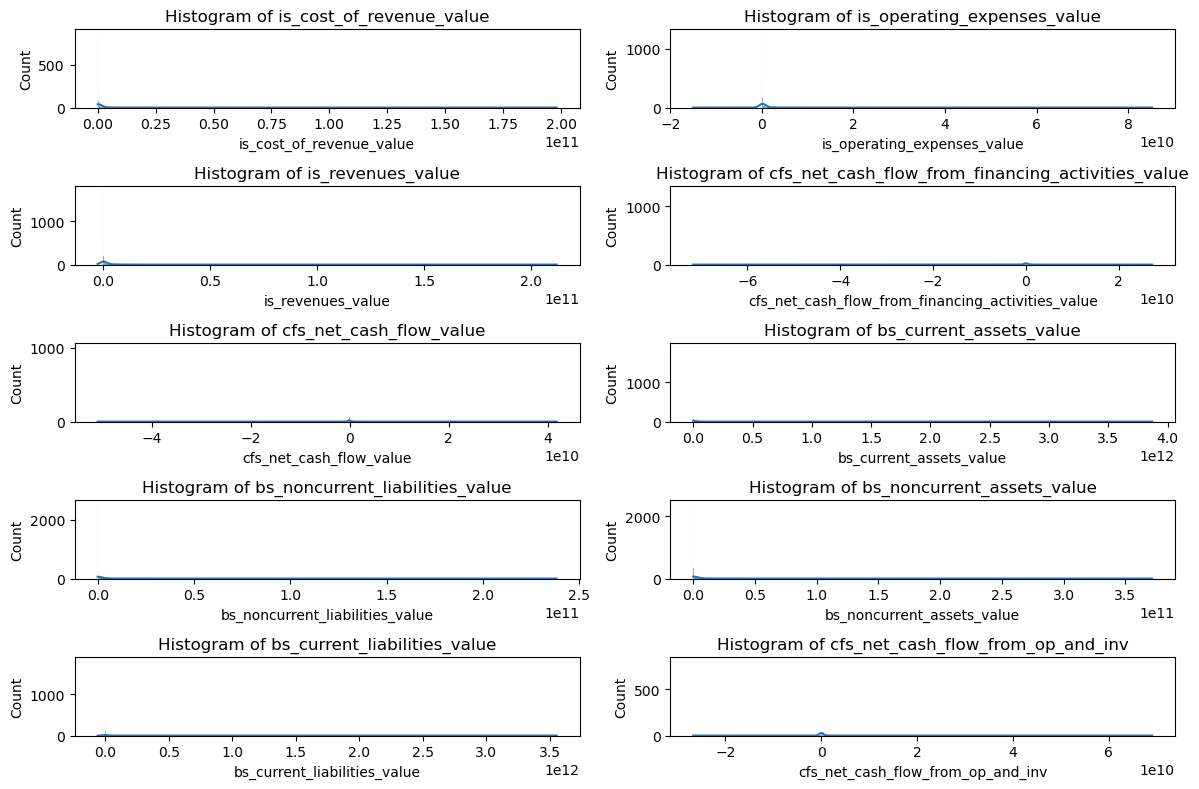

In [10]:
create_histogram_subplots(df_poly, feature_list)

In [11]:
# Replacing the nulls in each column with the medians:

# Calculating the median for each feature from the feature list
medians = df_poly[feature_list].median()

# Replace null values with their median value
df_poly[feature_list] = df_poly[feature_list].fillna(medians)

In [12]:
# Convert dataframe to csv for record and for use in future notebooks:
df_poly.to_csv("../data/cleaned_csvs_interim_steps/polygon_io_output_cleaned.csv", index=False)